In [3]:
from functools import partial

import torch.distributions
from transformer_lens import HookedTransformer
from IPython.display import SVG

import diego as d
from utils import sankey_diagram_of_connectome

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model = HookedTransformer.from_pretrained("gpt2-small")

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2-small into HookedTransformer


In [15]:
model = HookedTransformer.from_pretrained("attn-only-4l")

Loaded pretrained model attn-only-4l into HookedTransformer


Exploring: 0 connexions [00:00, ? connexions/s]

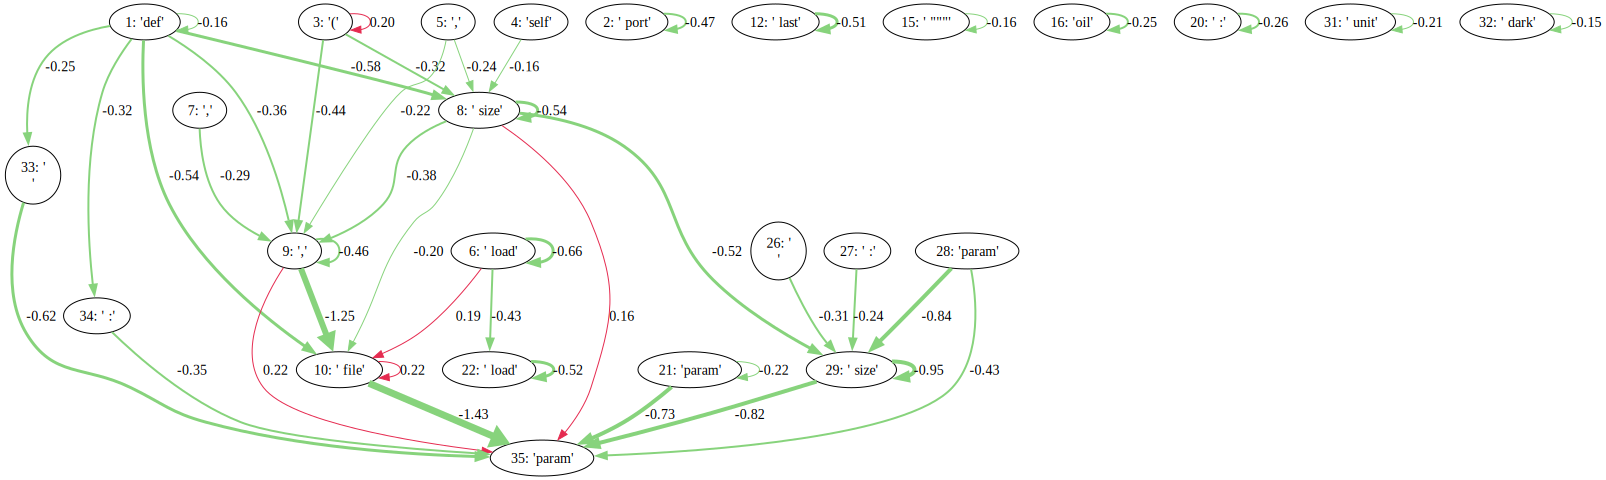

In [39]:
threshold = 0.15
prompt = "When Mary and John went to the store, John gave a book to"
corrupt_prompt = "When Tom and Sarah went to the store, Felix gave a book to"
prompt = '''def port(self, load, size, file, last):
    """oil column piece

    :param load: crime population
    :param size: unit dark
    :param'''
corrupt_prompt = prompt.replace("load", "banana").replace("size", "apple").replace("file", "pear").replace("last", "orange")
c = d.connectom(model, prompt,
          # d.logit_diff_metric(model, ' Mary', ' John'),
          d.logit_diffs_metric(model, ' file', [' self', ' load', ' size', ' last']),
          d.ZeroPattern(),
          # d.CorruptIntervention(model, prompt, corrupt_prompt),

          d.BasicStrategy(),
          # d.BacktrackBisectStrategy(threshold),
          # d.BacktrackingStrategy(threshold),
          # strategy=d.BisectStrategy(threshold),
)
# sankey_diagram_of_connectome(model, prompt, c, threshold=threshold);
d.plot_attn_connectome(model, prompt, c).show()
graph = d.plot_graphviz_connectome(model, prompt, c, threshold=threshold).pipe('svg').decode('utf-8')
SVG(graph)

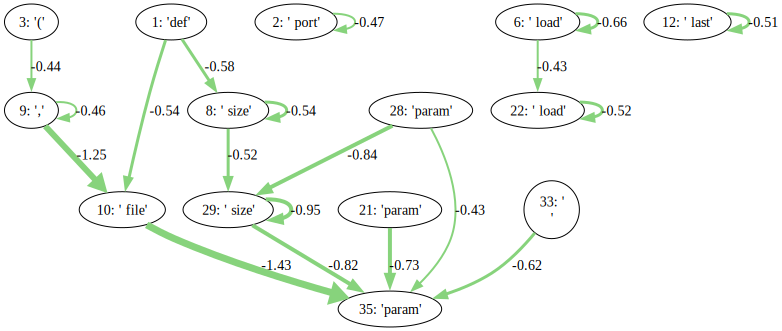

In [42]:
graph = d.plot_graphviz_connectome(model, prompt, c, threshold=0.4).pipe('svg').decode('utf-8')
SVG(graph)


  0%|          | 0/105 [00:00<?, ?it/s]

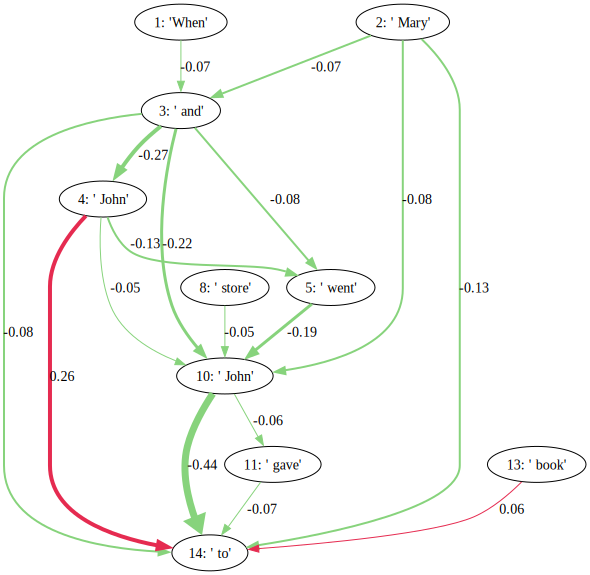

In [42]:
torch.topk()
dampening = 0.25
c = d.connectom(model, prompt,
          d.logit_diff_metric(model, ' Mary', ' John'),
          # d.CorruptIntervention(model, prompt, corrupt_prompt),
          d.DampenIntervention(dampening),
          # d.ZeroPattern(),
          d.BasicStrategy(),
          )
d.plot_attn_connectome(model, prompt, c).show()
graph = d.plot_graphviz_connectome(model, prompt, c, threshold=0.05).pipe('svg').decode('utf-8')
SVG(graph)